# Lecture 2

# Reachable and dexterous workspace

The reachable workspace is the entire set of points reachable by the manipulator,

The dexterous workspace consists of those points that the manipulator can reach with an arbitrary orientation of the end-effector. Obviously, the dexterous workspace is a subset of the reachable workspace.  

**Below you find a code to visualize the reachable and dexterous workspace of 2DoF manipulator.**

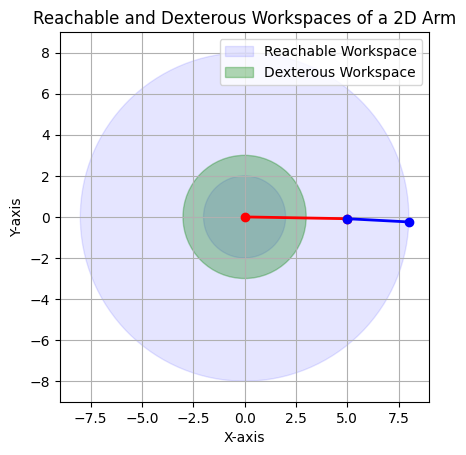

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define lengths of the robot arm links
L1 = 5
L2 = 3

# Function to compute the (x, y) position of the end-effector
def compute_end_effector(theta1, theta2):
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Set plot limits and labels
outer_radius = L1 + L2
inner_radius = abs(L1 - L2)
ax.set_xlim(-outer_radius - 1, outer_radius + 1)
ax.set_ylim(-outer_radius - 1, outer_radius + 1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Reachable and Dexterous Workspaces of a 2D Arm')

# Plot the reachable workspace
outer_circle = plt.Circle((0, 0), outer_radius, color='blue', alpha=0.1, label='Reachable Workspace')
inner_circle = plt.Circle((0, 0), inner_radius, color='blue', alpha=0.1)
ax.add_artist(outer_circle)
ax.add_artist(inner_circle)

# Plot the dexterous workspace
dexterous_radius = min(L1, L2)
dexterous_circle = plt.Circle((0, 0), dexterous_radius, color='green', alpha=0.3, label='Dexterous Workspace')
ax.add_artist(dexterous_circle)

# Initialize the arm lines
line1, = ax.plot([], [], 'ro-', lw=2)
line2, = ax.plot([], [], 'bo-', lw=2)

# Initialize the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# Animation function
def animate(i):
    theta1 = np.radians(i)
    theta2 = np.radians(i * 2)  # Speed up second joint for better visualization

    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)
    x2, y2 = compute_end_effector(theta1, theta2)

    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1, x2], [y1, y2])

    return line1, line2

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)

# Display the plot
plt.legend()
plt.grid(True)

# To display animation in a Jupyter notebook, use the following lines:
#from IPython.display import HTML
#HTML(ani.to_jshtml())

# Save the animation as an HTML file
ani.save('robot_arm_animation.html', writer='html', fps=30)

plt.show()


## (A) Pen and paper exercises
**Exercise 1: Derive the forward kinematics for a 3-DOF RRR (Revolute-Revolute-Revolute) planar manipulator arm in 2D space. Given the joint angles $𝜃_1$, $𝜃_2$  ,$𝜃_3$, and the link lengths $𝑙_1$,$𝑙_2$, $𝑙_3$, and determine the position ($x$, $y$) and orientation $ϕ$ of the end-effector.**

**Exercise 2:  Derive the inverse kinematic solutions for a 3-DOF RRR (Revolute-Revolute-Revolute) planar manipulator arm in 2D space. Given the link lengths$𝑙_1$,$𝑙_2$, $𝑙_3$  and the desired end-effector position $($x,$ $y) and orientation$ $ϕ, find the joint angles$𝜃_1$, $𝜃_2$  ,$𝜃_3$​. Include all possible configurations (elbow up and elbow down) in your solution**


**Exercise 3: How many analytical solutions exist?**st?**


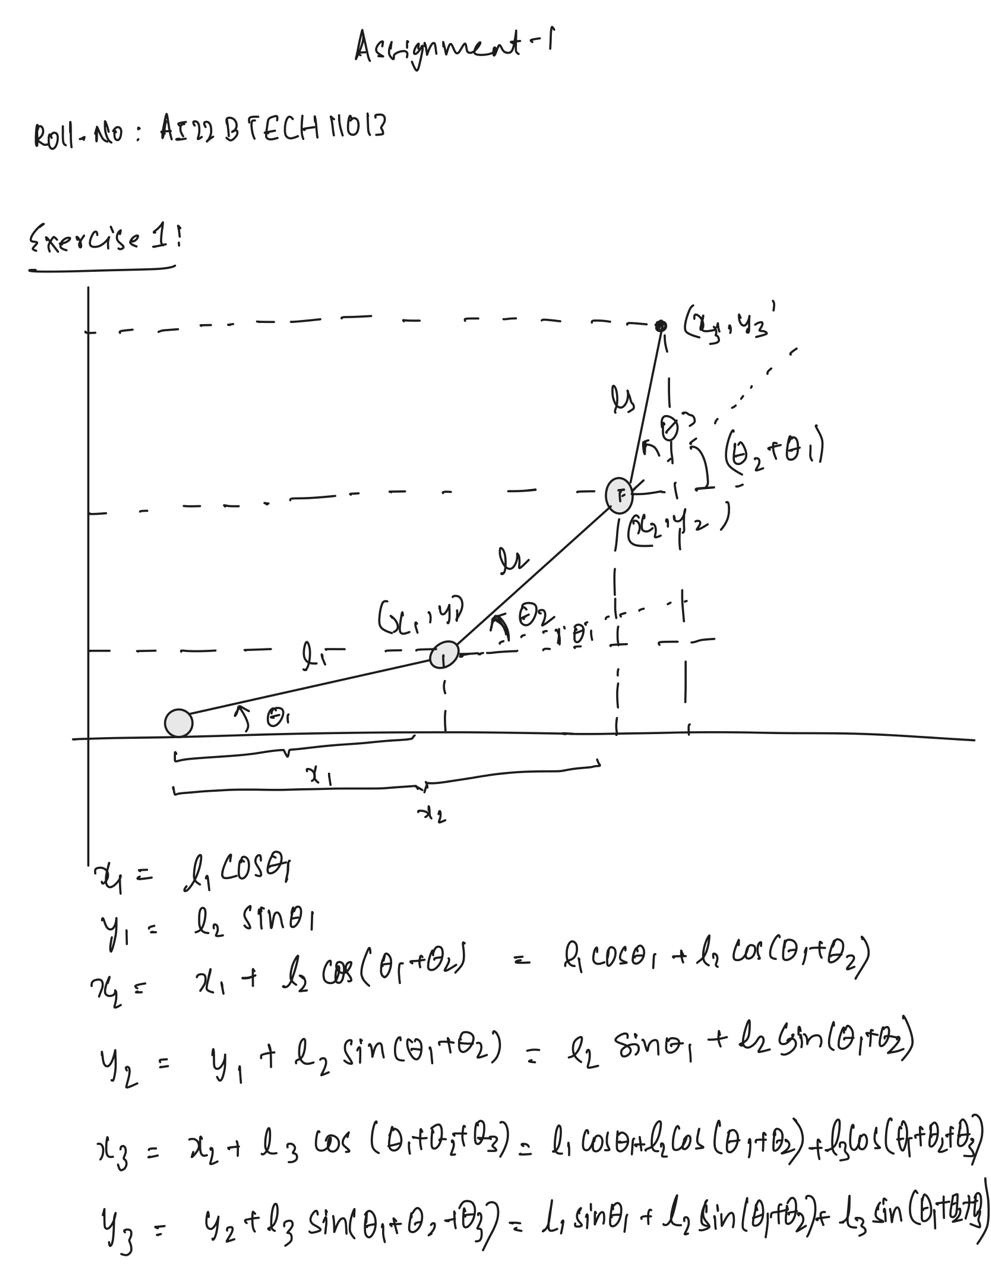

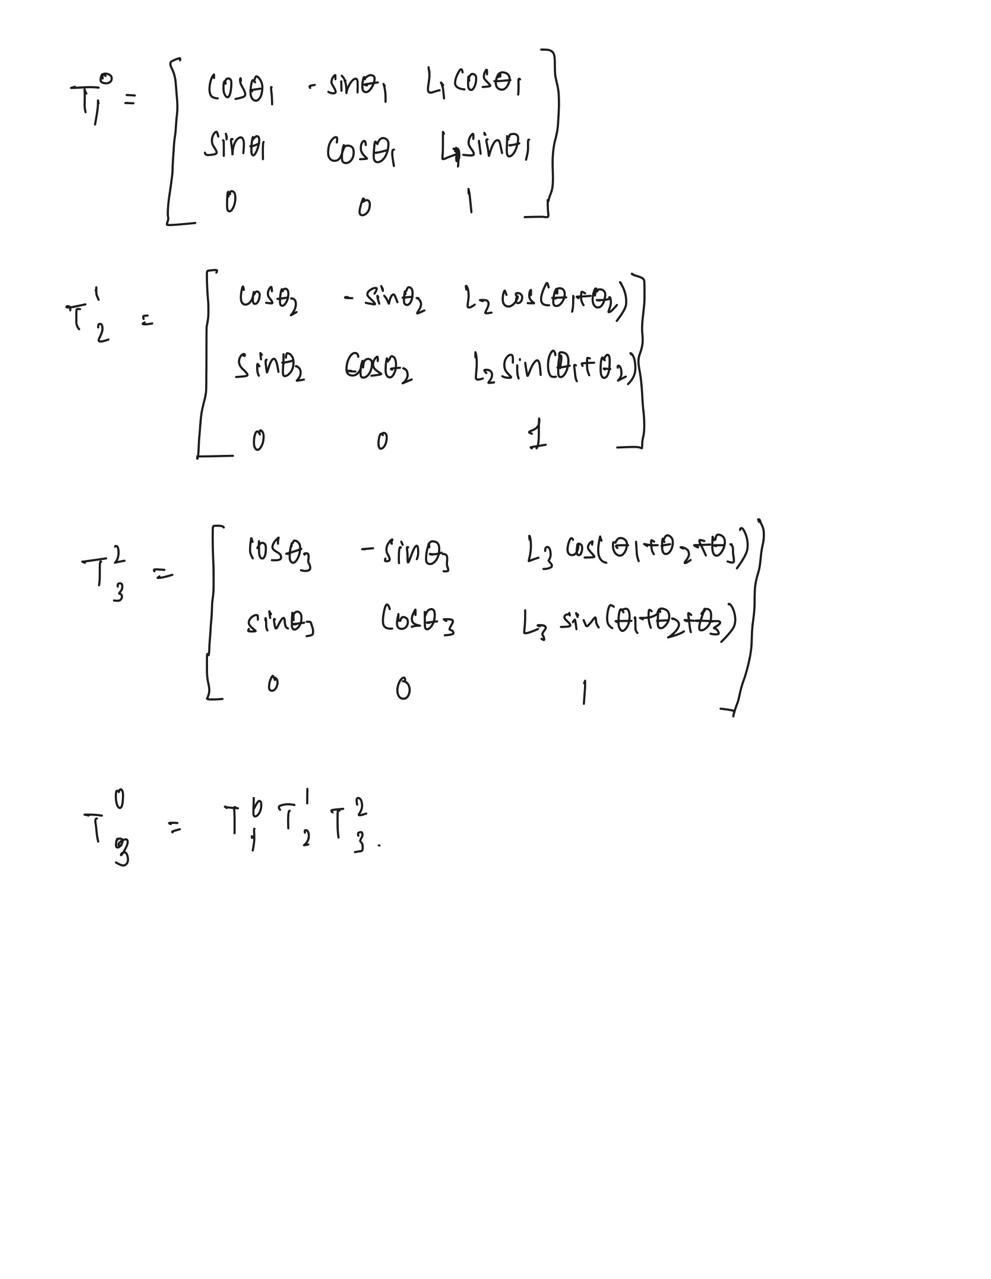

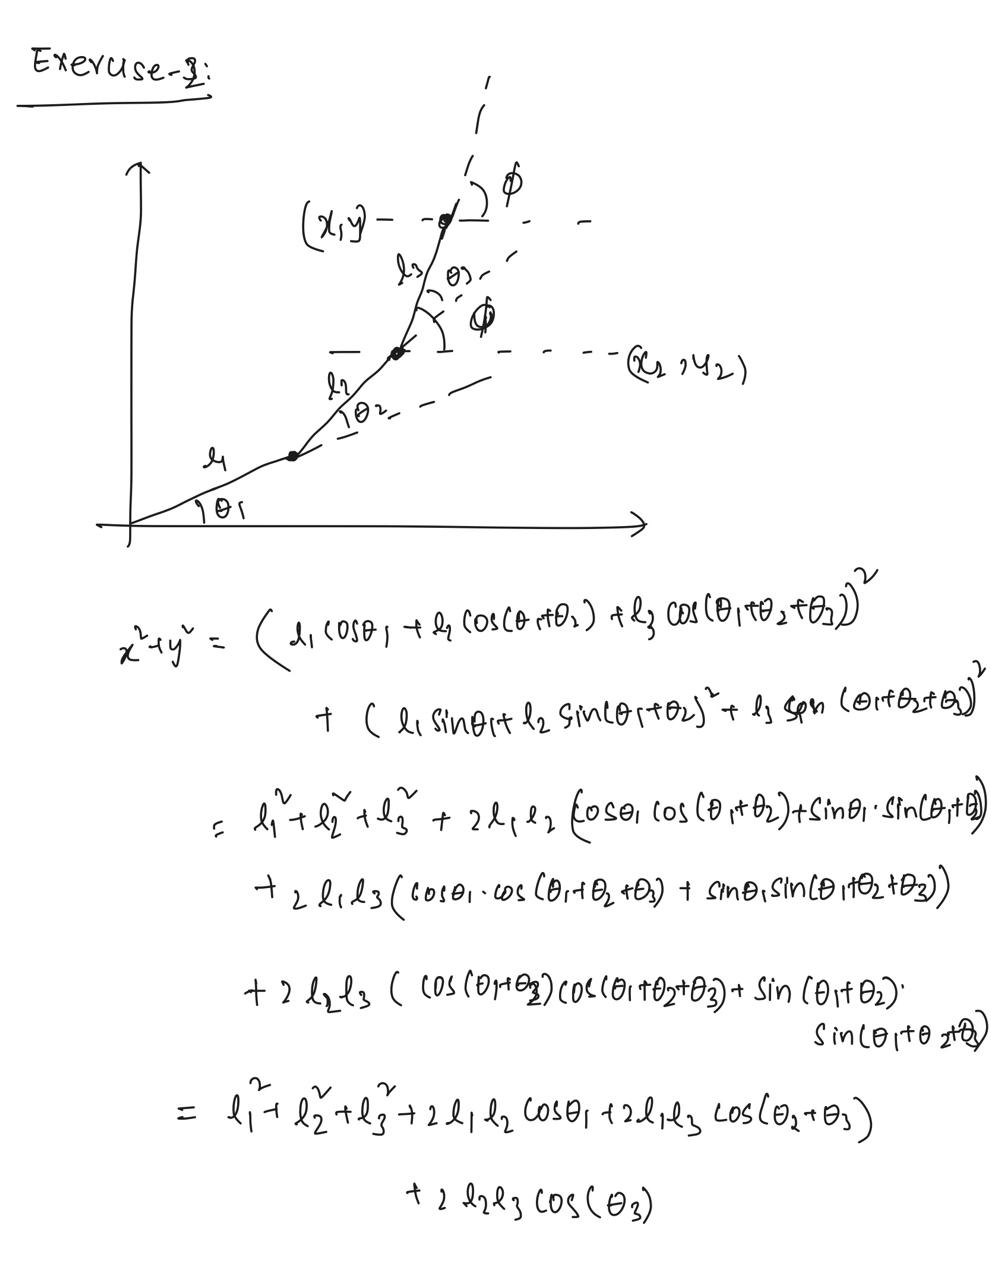

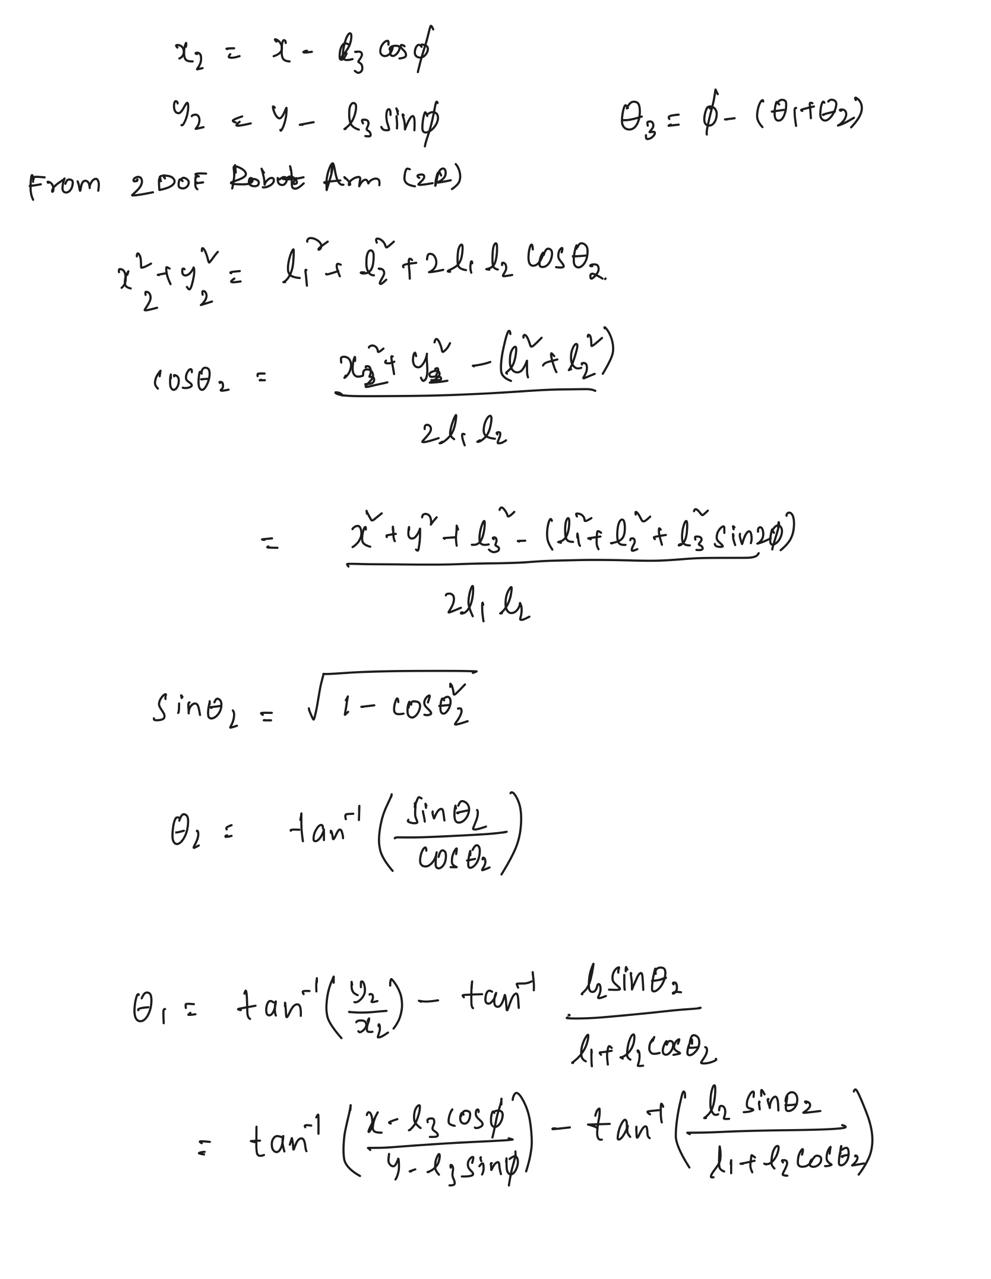

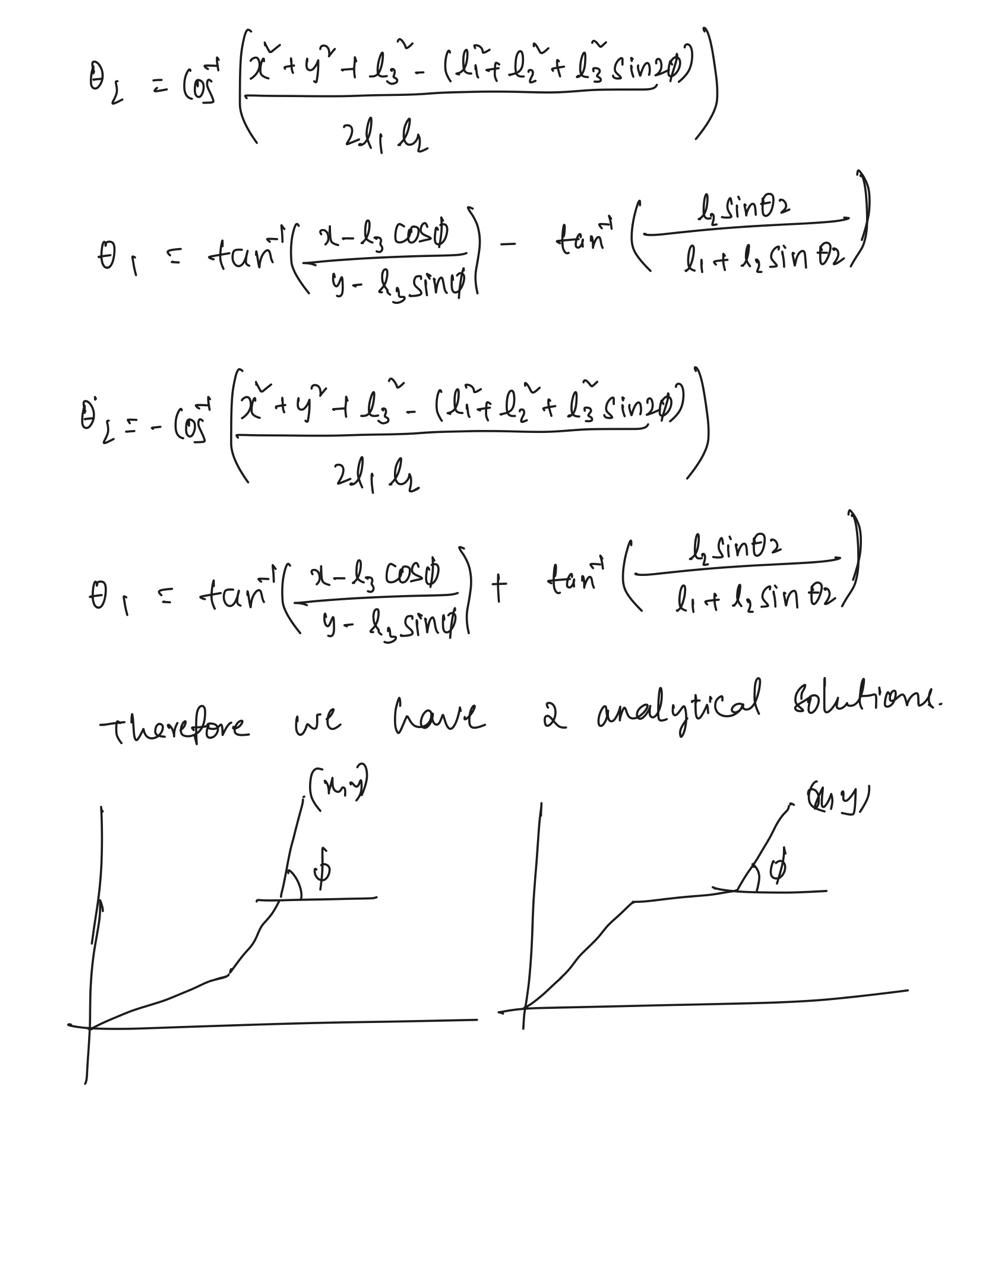

# Forward Kinematics of a Two-Link Robotic Arm
The image provided shows a diagram of a two-link robotic arm with lengths $l_1$, $l_2$ and joint angles $theta_1$, $theta_2$
<div>
<img src="attachment:92998e89-3e66-4513-a004-ba582c7d467a.png" width="500"/>
</div>

This information is sufficient to calculate the forward kinematics of the arm.

The forward kinematics for a two-link arm can be computed using the following equations:

$
𝑥 = 𝐿_1 cos (𝜃_1) + 𝐿_2 cos(𝜃_1+𝜃_2)
$

$
 𝑦=𝐿_1 sin(𝜃_1)+𝐿_2sin(𝜃_1+𝜃_2)
$

# (B) Programming Exercises
**Exercise 1: Write down a Matlab/Python code to calculate
forward kinematics of two degree of freedom arm (RR) considering 2-dimensional environment**


In [2]:
import numpy as np

def forward_kinematics(L1, L2, theta1, theta2):
    """
    Calculate the forward kinematics of a two-link robotic arm.

    Parameters:
    L1 (float): Length of the first link
    L2 (float): Length of the second link
    theta1 (float): Angle of the first joint (in degrees)
    theta2 (float): Angle of the second joint (in degrees)

    Returns:
    tuple: (x, y) position of the end effector
    """
    # Convert angles from degrees to radians
    theta1_rad = np.radians(theta1)
    theta2_rad = np.radians(theta2)

    # Calculate the (x, y) position of the end effector
    #write your code here
    x = L1 * np.cos(theta1_rad) + L2 * np.cos(theta1_rad + theta2_rad)
    y = L1 * np.sin(theta1_rad) + L2 * np.sin(theta1_rad + theta2_rad)

    return (x, y)

# Example usage
L1 = 5.0  # Length of the first link
L2 = 3.0  # Length of the second link
theta1 = 45  # Angle of the first joint in degrees
theta2 = 30  # Angle of the second joint in degrees

# Calculate the forward kinematics
end_effector_position = forward_kinematics(L1, L2, theta1, theta2)
print("End effector position:", end_effector_position)


End effector position: (4.311991041240301, 6.433311384799942)




# Inverse Kinematics of a Two-Link Robotic Arm

## Introduction
Calculating the inverse kinematics for a two-link robotic arm involves determining the joint angles
$𝜃_1$  and $𝜃_2$,  given the end effector's desired position (𝑥,𝑦). The equations for inverse kinematics are derived from the arm's geometry and trigonometric relationships.

## Parameters

- $L_1$: Length of the first link
- $L_2$: Length of the second link
- $x, y$: Desired position of the end effector

## Equations

### Step 1: Calculate the distance from the base to the end effector

$ r = \sqrt{x^2 + y^2} $

### Step 2: Check Reachability

The position $(x, y)$ is reachable if and only if:

$ |L_1 - L_2| \leq r \leq L_1 + L_2 $

If this condition is not met, the position is not reachable.

### Step 3: Calculate $\theta_2$ using the Cosine Rule

The cosine rule for the angle between $L_1$ and $L_2$ is:

$ \cos(\theta_2) = \frac{x^2 + y^2 - L_1^2 - L_2^2}{2 L_1 L_2} $

Using this, we find $\theta_2$:

$ \theta_2 = \arctan2(\sqrt{1 - \cos^2(\theta_2)}, \cos(\theta_2)) $

Where:

$ \cos(\theta_2) = \frac{x^2 + y^2 - L_1^2 - L_2^2}{2 L_1 L_2} $

$ \sin(\theta_2) = \sqrt{1 - \cos^2(\theta_2)} $

We use the positive branch of the square root because it corresponds to the typical configuration of the arm.

### Step 4: Calculate $\theta_1$

We use the following auxiliary variables:

$ k_1 = L_1 + L_2 \cos(\theta_2) $

$ k_2 = L_2 \sin(\theta_2) $

Then, $\theta_1$ is given by:

$ \theta_1 = \arctan2(y, x) - \arctan2(k_2, k_1) $


**Exercise 2: Write down a Matlab/Python code to calculate
inverse kinematics of two degree of freedom arm (RR) considering 2-dimensional environment**


In [3]:
import numpy as np

def inverse_kinematics(L1, L2, x, y):
    """
    Calculate the inverse kinematics of a two-link robotic arm.

    Parameters:
    L1 (float): Length of the first link
    L2 (float): Length of the second link
    x (float): X position of the end effector
    y (float): Y position of the end effector

    Returns:
    tuple: (theta1, theta2) angles of the joints in degrees
    """
    # Calculate the distance from the base to the end effector
    r = np.sqrt(x**2 + y**2)

    # Check if the position is reachable
    if r > (L1 + L2) or r < abs(L1 - L2):
        raise ValueError("The position is not reachable.")

    # Calculate the angle for the second joint using the cosine rule
    #write your code here
    cos_theta2 = (x**2+y**2-L1**2-L2**2)/(2*L1*L2)
    sin_theta2 = (1-np.cos(cos_theta2)**2)**0.5   # Use positive branch of sqrt
    theta2 = np.arctan2(sin_theta2, cos_theta2)

    # Calculate the angle for the first joint
    k1 = L1 + L2 * cos_theta2
    k2 = L2 * sin_theta2
    #write your code here
    theta1 = np.arctan2(y,x) - np.arctan2(k2,k1)

    # Convert angles from radians to degrees
    theta1_deg = np.degrees(theta1)
    theta2_deg = np.degrees(theta2)

    return (theta1_deg, theta2_deg)

# Example usage
L1 = 5.0  # Length of the first link
L2 = 3.0  # Length of the second link
x = 4.0   # Desired X position of the end effector
y = 4.0   # Desired Y position of the end effector

# Calculate the inverse kinematics
joint_angles = inverse_kinematics(L1, L2, x, y)
print("Joint angles:", joint_angles)


Joint angles: (42.615820903082245, 135.0212238018265)
